## This program predicts weather temperature based on jena_climate_2009_2016 dataset

## This model uses LSTM to predict the temperature

### download  jena dataset  from https://www.kaggle.com/datasets/stytch16/jena-climate-2009-2016

### import relevant libraries


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,callbacks
import matplotlib.pyplot as plt
import pandas as pd

### This function plot histroy of neural network model to analyze the result.

In [2]:
def plot(data):
    loss=data['mae']
    val=data['val_mae']
    epochs=range(1,len(loss)+1)
    plt.figure()
    plt.yscale='log'
    plt.plot(epochs,loss,"bo",label="Training")
    plt.plot(epochs,val,"b", label="Validation")
    plt.title("Training and validation")
    plt.legend()
    plt.show()

---
## 1. Preparing Data

### 1.1 load dataset

In [3]:
fname = os.path.join("jena_climate_2009_2016.csv")
df = pd.read_csv(fname)

### 1.2 remove all feature but temprture

In [4]:
df= df['T (degC)']

### 1.3 divide dataset to 3 parts (train / Validation / Test) and normalize them

In [5]:
l=len(df)
num_train_sample= int(l*0.5)
num_val_sample= int(l*0.25)

#### 1.4.1 normalizing data according to train data

In [6]:
mean=df[:num_train_sample].mean(axis=0)
std = df[:num_train_sample].std(axis=0)
df-=mean
df/=std

#### 1.4.2 divide dataset to 3 parts (train / Validation / Test)

#####  Note: Our sample rate is every 6 hours and our time series containts 120 record for prediction

In [13]:
sample_rate= 6
sequence_length = 120
delay = sample_rate*(sequence_length+24-1)
batch_size = 255

train_dataset = keras.utils.timeseries_dataset_from_array(
    df[:-delay][:],
    targets=df[delay:],
    sampling_rate=sample_rate,
    sequence_length = sequence_length,
    shuffle=True,
    batch_size=batchsize,
    start_index=0,
    end_index=num_train_sample
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    df[:-delay][:],
    targets=df[delay:],
    sampling_rate=sample_rate,
    sequence_length = sequence_length,
    shuffle=True,
    batch_size=batchsize,
    start_index=num_train_sample,
    end_index=num_train_sample+num_val_sample
)
test_dataset = keras.utils.timeseries_dataset_from_array(
    df[:-delay],
    targets=df[delay:],
    sampling_rate=sample_rate,
    sequence_length = sequence_length,
    shuffle=True,
    batch_size=batchsize,
    start_index=num_train_sample+num_val_sample
)


### 1.5 Calculate the base error

In [14]:
error=0
num_sample=0
for samples,target in train_dataset:
    error+=np.sum(np.abs(samples[:,-1]-target))
    num_sample+=samples.shape[0]

base_error = error/num_sample
print(base_error)

0.3068828974133466


## Base Error(normalaized data): 0.307

---
## 2. Train

### 2.1 create model

In [49]:
for s,t in train_dataset:
    print(t.shape)


(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)
(255,)

In [83]:
def create_lstm():
    inputs = keras.Input(shape=(sequence_length,1))
    x = layers.LSTM(units= 16, recurrent_dropout=0.25)(inputs)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs=inputs,outputs=outputs)
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

### 2.2 define callback

In [84]:
model = create_lstm()

### 2.3 train model based on train data

In [76]:
callbacks=[
    keras.callbacks.ModelCheckpoint("jena-single-lstm-16",save_best_only=True)
]

h=model.fit(train_dataset,
            epochs=10,
            validation_data=val_dataset,
            callbacks=callbacks)

Epoch 1/10
822/822 [==============================] - ETA: 0s - loss: 0.1709 - mae: 0.3210INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


822/822 [==============================] - 104s 125ms/step - loss: 0.1709 - mae: 0.3210 - val_loss: 0.1230 - val_mae: 0.2733
Epoch 2/10
822/822 [==============================] - ETA: 0s - loss: 0.1469 - mae: 0.3002INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


822/822 [==============================] - 107s 130ms/step - loss: 0.1469 - mae: 0.3002 - val_loss: 0.1224 - val_mae: 0.2724
Epoch 3/10
822/822 [==============================] - ETA: 0s - loss: 0.1439 - mae: 0.2968INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


822/822 [==============================] - 115s 140ms/step - loss: 0.1439 - mae: 0.2968 - val_loss: 0.1223 - val_mae: 0.2728
Epoch 4/10
822/822 [==============================] - 124s 151ms/step - loss: 0.1417 - mae: 0.2945 - val_loss: 0.1234 - val_mae: 0.2738
Epoch 5/10
822/822 [==============================] - 116s 141ms/step - loss: 0.1401 - mae: 0.2928 - val_loss: 0.1237 - val_mae: 0.2733
Epoch 6/10
822/822 [==============================] - 122s 148ms/step - loss: 0.1384 - mae: 0.2911 - val_loss: 0.1226 - val_mae: 0.2729
Epoch 7/10
822/822 [==============================] - ETA: 0s - loss: 0.1372 - mae: 0.2899INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


822/822 [==============================] - 121s 147ms/step - loss: 0.1372 - mae: 0.2899 - val_loss: 0.1216 - val_mae: 0.2716
Epoch 8/10
822/822 [==============================] - ETA: 0s - loss: 0.1363 - mae: 0.2891INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


822/822 [==============================] - 126s 154ms/step - loss: 0.1363 - mae: 0.2891 - val_loss: 0.1205 - val_mae: 0.2714
Epoch 9/10
822/822 [==============================] - 133s 161ms/step - loss: 0.1357 - mae: 0.2884 - val_loss: 0.1206 - val_mae: 0.2718
Epoch 10/10
822/822 [==============================] - ETA: 0s - loss: 0.1351 - mae: 0.2877INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


INFO:tensorflow:Assets written to: jena-single-lstm-16\assets


822/822 [==============================] - 128s 156ms/step - loss: 0.1351 - mae: 0.2877 - val_loss: 0.1174 - val_mae: 0.2682


### 2.3 analyze the model history 

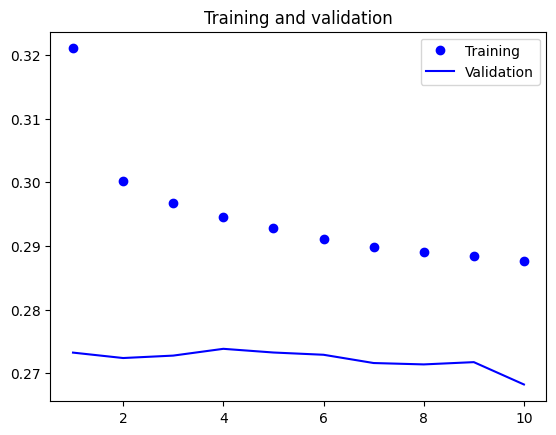

In [77]:
plot(h.history)

---
## 3. Test

### 3.1 Load best model

In [79]:
model.load_weights("jena-single-lstm-16")

### 3.2 Evaluate

In [80]:
eval_result=model.evaluate(test_dataset)

407/407 [==============================] - 25s 59ms/step - loss: 0.1325 - mae: 0.2866


### 3.3 calculate error 

In [81]:
eval_result

[0.1325116902589798, 0.28655093908309937]